In [124]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [125]:
data = pd.read_csv('LoanPredictionDataset.csv')
df = data.copy()
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [126]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [128]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [129]:
# missing value'ları numerik değerler için ortalama ile dolduralım.

df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mean())

# misin value'ları kategorik değerler için mode ile dolduralım.

df['Gender'] = df["Gender"].fillna(df['Gender'].mode()[0])
df['Married'] = df["Married"].fillna(df['Married'].mode()[0])
df['Dependents'] = df["Dependents"].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df["Self_Employed"].fillna(df['Self_Employed'].mode()[0])

In [130]:
print(df['Gender'].mode()[0])
print(df['Married'].mode()[0])
print(df['Dependents'].mode()[0])
print(df['Self_Employed'].mode()[0])

Male
Yes
0
No


In [131]:
# tekrardan data frame'imizin bilgilerine erişirsek

df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


### Keşifçi Veri Analizi

In [133]:
#sns.countplot(df['Gender'])

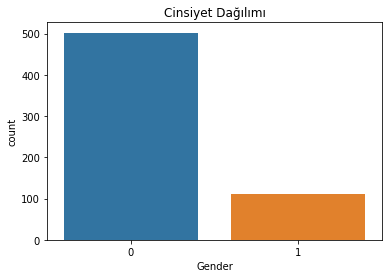

In [134]:
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

sns.countplot(x='Gender', data=df)
plt.title("Cinsiyet Dağılımı")
plt
plt.show()

In [118]:
sns.countplot(df['Married'])

TypeError: cannot convert the series to <class 'float'>

In [76]:
sns.countplot(df['Dependents'])

ValueError: could not convert string to float: '3+'

In [77]:
sns.countplot(df['Education'])

ValueError: could not convert string to float: 'Graduate'

In [78]:
sns.countplot(df['Self_Employed'])

ValueError: could not convert string to float: 'No'

In [79]:
sns.countplot(df['Property_Area'])

ValueError: could not convert string to float: 'Urban'

In [80]:
sns.countplot(df['Loan_Status'])

ValueError: could not convert string to float: 'Y'

## Yeni attributes oluşturalım.

In [81]:
# total income 

df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0


D:\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


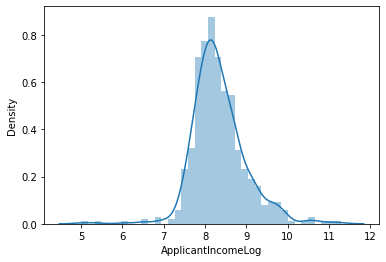

In [82]:
df['ApplicantIncomeLog'] = np.log(df['ApplicantIncome'])
sns.distplot(df['ApplicantIncomeLog'])

D:\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


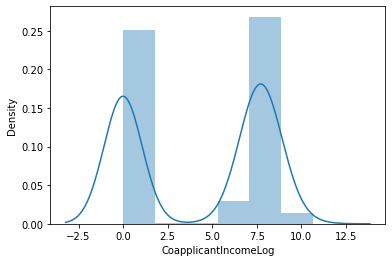

In [83]:
df['CoapplicantIncomeLog'] = np.log(1 + df['CoapplicantIncome'])
sns.distplot(df['CoapplicantIncomeLog'])

D:\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


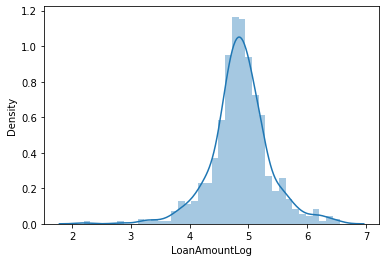

In [84]:
df['LoanAmountLog'] = np.log(df['LoanAmount'])
sns.distplot(df['LoanAmountLog'])

D:\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  
D:\anaconda3\lib\site-packages\seaborn\distributions.py:2511: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.1`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


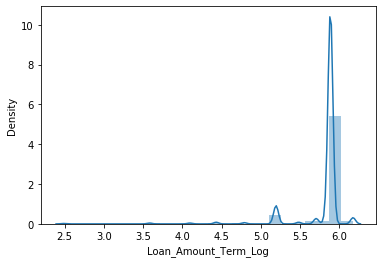

In [85]:
df['Loan_Amount_Term_Log'] = np.log(df['Loan_Amount_Term'])
sns.distplot(df['Loan_Amount_Term_Log'], kde_kws={'bw':0.1})

## Korelasyon Matrisi

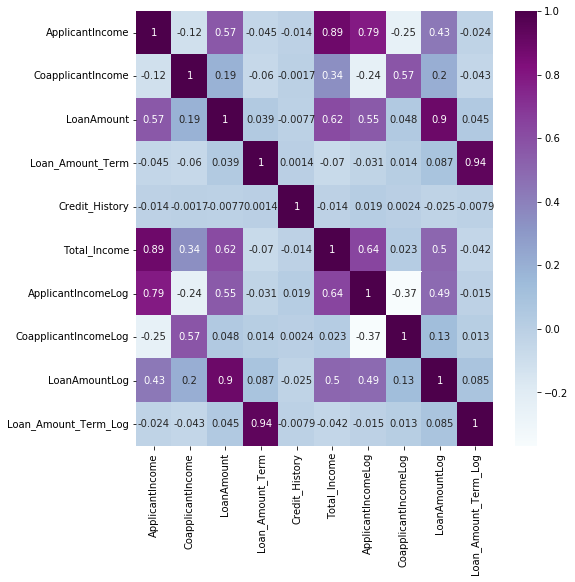

In [86]:
corr = df.corr()
plt.figure(figsize= (8,8))
sns.heatmap(corr, annot= True, cmap= 'BuPu')

In [87]:
# modeli oluşturmadan önce model için gereksiz kolonları verisetinden atalım.

cols = ['ApplicantIncome', 'CoapplicantIncome', "LoanAmount", "Loan_Amount_Term", "Total_Income", 'Loan_ID', 'CoapplicantIncomeLog']
df = df.drop(columns= cols, axis=1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log
0,Male,No,0,Graduate,No,1.0,Urban,Y,8.674026,4.986426,5.886104
1,Male,Yes,1,Graduate,No,1.0,Rural,N,8.430109,4.852030,5.886104
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,8.006368,4.189655,5.886104
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,7.856707,4.787492,5.886104
4,Male,No,0,Graduate,No,1.0,Urban,Y,8.699515,4.948760,5.886104


## Label Encoding 

In [88]:
from sklearn.preprocessing import LabelEncoder

In [89]:
cols = ['Gender','Married','Education', 'Self_Employed', 'Property_Area', 'Loan_Status', 'Dependents']
le = LabelEncoder()

for col in cols:
    df[col] = le.fit_transform(df[col])

In [90]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log
0,1,0,0,0,0,1.0,2,1,8.674026,4.986426,5.886104
1,1,1,1,0,0,1.0,0,0,8.430109,4.852030,5.886104
2,1,1,0,0,1,1.0,2,1,8.006368,4.189655,5.886104
3,1,1,0,1,0,1.0,2,1,7.856707,4.787492,5.886104
4,1,0,0,0,0,1.0,2,1,8.699515,4.948760,5.886104


## Train - Test Split

In [91]:
X = df.drop(columns= ['Loan_Status'], axis= 1)
y = df['Loan_Status']

In [92]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state= 42)

## Model Training

In [93]:
from sklearn.model_selection import cross_val_score
def classify(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state= 42)
    model.fit(X_train, y_train)
    print('Accuracy is', model.score(X_test, y_test) * 100)
    score = cross_val_score(model, X, y, cv= 5)
    print('Cross validation is', np.mean(score) * 100)

In [94]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
classify(model, X, y)

Accuracy is 77.27272727272727
Cross validation is 80.9462881514061


In [95]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
classify(model, X, y)

Accuracy is 74.02597402597402
Cross validation is 70.52379048380647


In [96]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

model = RandomForestClassifier()
classify(model, X, y)

Accuracy is 79.22077922077922
Cross validation is 79.31893909103024


In [97]:
model = ExtraTreesClassifier()
classify(model, X, y)

Accuracy is 75.32467532467533
Cross validation is 75.57643609222977


## Hyperparameter Tuning

In [98]:
model = RandomForestClassifier(n_estimators= 100, min_samples_split= 25, max_depth= 7, max_features= 1)
classify(model, X, y)

# Çeşitli döngüler ile belirli sayıları tek tek deneyerek uygun parametreleri bulup yüksek performans elde edebiliriz.

Accuracy is 76.62337662337663
Cross validation is 80.12794882047181


## Confusion Matrix

In [99]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [100]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[24, 30],
       [ 4, 96]], dtype=int64)

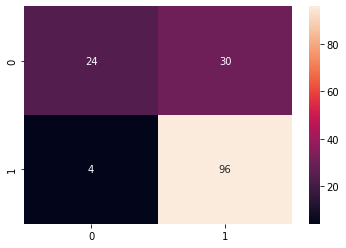

In [101]:
sns.heatmap(cm, annot= True)